# Building a CNN from scratch

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [11]:
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'D:\\Soda Bottles\\val\\train'
validation_data_dir = 'D:\\Soda Bottles\\val\\val' 
test_data_dir = 'D:\\Soda Bottles\\val\\test' 

nb_train_samples = 2000
nb_validation_samples = 800
epochs = 15
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8))
model.add(Activation('softmax'))

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
__________

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5003 images belonging to 8 classes.
Found 1468 images belonging to 8 classes.
Found 144 images belonging to 8 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/15
125/125 [==============================] - 206s 2s/step - loss: 1.8918 - acc: 0.2410 - val_loss: 1.8436 - val_acc: 0.1837
Epoch 2/15
125/125 [==============================] - 177s 1s/step - loss: 1.2193 - acc: 0.5075 - val_loss: 1.0566 - val_acc: 0.4812
Epoch 3/15
125/125 [==============================] - 137s 1s/step - loss: 0.8922 - acc: 0.6374 - val_loss: 0.9837 - val_acc: 0.6262
Epoch 4/15
125/125 [==============================] - 106s 851ms/step - loss: 0.6193 - acc: 0.7560 - val_loss: 0.8288 - val_acc: 0.6495
Epoch 5/15
125/125 [==============================] - 106s 849ms/step - loss: 0.5275 - acc: 0.7945 - val_loss: 0.7456 - val_acc: 0.7812
Epoch 6/15
125/125 [==============================] - 106s 847ms/step - loss: 0.4628 - acc: 0.8178 - val_loss: 0.6436 - val_acc: 0.8455
Epoch 7/15
125/125 [

# Note that i have run just 15 epochs and the model has given almost 90% accuracy. Accuracy may increase with different optimizer or may be by running more epochs or by adding more layers in model.

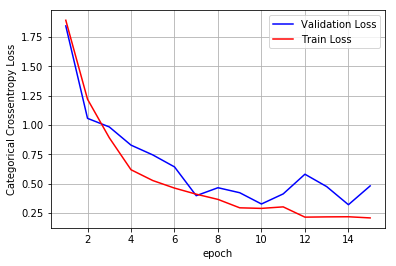

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [16]:
def plots(im,t):
    a,ax=plt.subplots(4,4,figsize=(12,13))
    k=0
    for i in range(4):
        for j in range(4):
            ax[i,j].imshow(im[k])
            ax[i,j].set_title(label=test_generator_class.get(test_labels[k].argmax()))
            k=k+1

In [30]:
import numpy as np
timages=[]
tlabels=[]
for i in range(int(len(test_generator.filenames)/batch_size)):
    test_images,test_labels=next(test_generator)
    timages.extend(test_images)
    tlabels.extend(test_labels)
    
print(test_generator.class_indices)
#print(test_generator.filenames)
#print(test_generator.classes)

{'M.Beer': 0, 'MD.Diet': 1, 'MD.Orig': 2, 'P.Cherry': 3, 'P.Orig': 4, 'P.Rsugar': 5, 'P.Zero': 6, 'P.diet': 7}


In [34]:
ntimages=np.array(timages)
ntlabels=np.array(tlabels)

In [75]:
k=[k for k,v in test_generator.class_indices.items()]
k

['M.Beer',
 'MD.Diet',
 'MD.Orig',
 'P.Cherry',
 'P.Orig',
 'P.Rsugar',
 'P.Zero',
 'P.diet']

In [22]:
test_generator_class={value: key for key,value in test_generator.class_indices.items()}

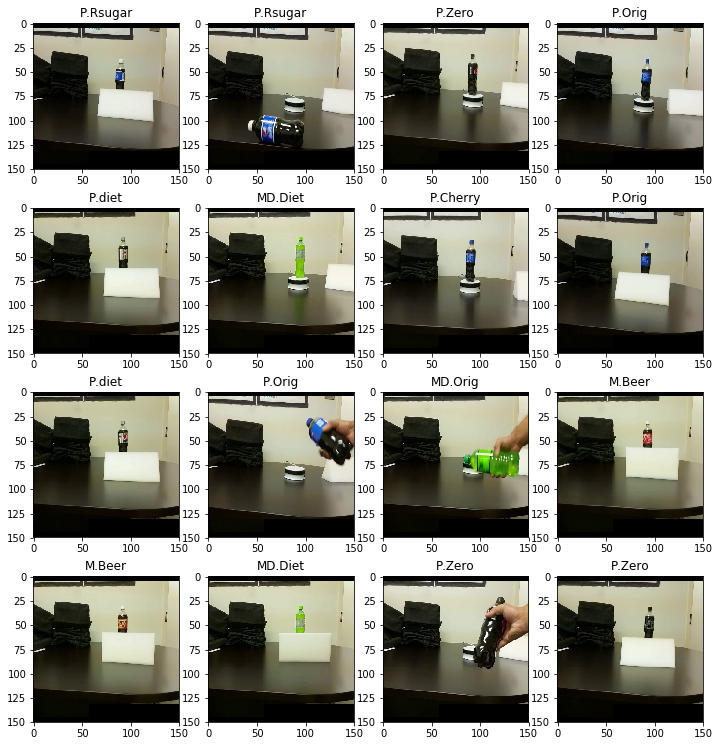

In [23]:
plots(test_images,test_labels)

In [80]:
test_pred=model.predict(ntimages) 
pred=test_pred.argmax(axis=1)
tru=ntlabels.argmax(axis=1)
print("Accuracy=",accuracy_score(tru,pred))

Accuracy= 0.875


In [56]:
#print(test_pred.shape)
#print(ntlabels.shape)
#test_pred=model.predict_generator(test_generator,len(test_generator.filenames)/batch_size) 

In [60]:
cm=confusion_matrix(tru, pred)

In [78]:
#https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
#Below confusion matrix plotting code is taken from above link

import matplotlib.pyplot as plt
    import numpy as np
    import itertools

def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
            accuracy = np.trace(cm) / float(np.sum(cm))
            misclass = 1 - accuracy

            #if cmap is None:
            cmap = plt.get_cmap('Blues')

            plt.figure(figsize=(8, 6))
            plt.imshow(cm, interpolation='nearest', cmap=cmap)
            plt.title('Confusion Matrix')
            plt.colorbar()

            if target_names is not None:
                tick_marks = np.arange(len(target_names))
                plt.xticks(tick_marks, target_names, rotation=45)
                plt.yticks(tick_marks, target_names)

            if normalize:
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


            thresh = cm.max() / 1.5 if normalize else cm.max() / 2
            for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
                if normalize:
                    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                             horizontalalignment="center",
                             color="white" if cm[i, j] > thresh else "black")
                else:
                    plt.text(j, i, "{:,}".format(cm[i, j]),
                             horizontalalignment="center",
                             color="white" if cm[i, j] > thresh else "black")


            plt.tight_layout()
            plt.ylabel('True label')
            plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
            plt.show()

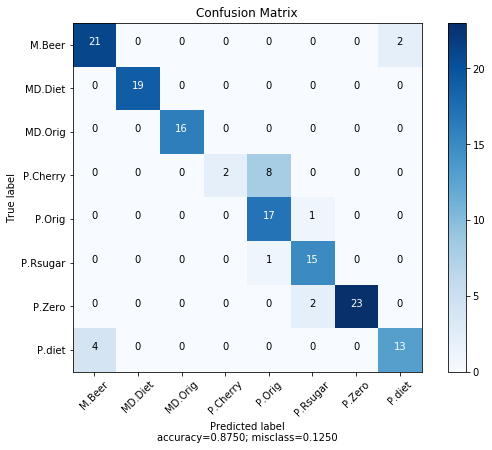

In [79]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = k,
                      title        = "Confusion Matrix")

# Lets use Adam optimizer and also increase number of epochs to 30

In [81]:
epochs = 30
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Found 5003 images belonging to 8 classes.
Found 1468 images belonging to 8 classes.
Found 144 images belonging to 8 classes.
Epoch 1/30
125/125 [==============================] - 106s 850ms/step - loss: 0.2105 - acc: 0.9320 - val_loss: 0.2832 - val_acc: 0.9150
Epoch 2/30
125/125 [==============================] - 103s 825ms/step - loss: 0.1715 - acc: 0.9380 - val_loss: 0.3506 - val_acc: 0.9259
Epoch 3/30
125/125 [==============================] - 110s 878ms/step - loss: 0.1628 - acc: 0.9480 - val_loss: 0.3978 - val_acc: 0.9025
Epoch 4/30
125/125 [==============================] - 109s 869ms/step - loss: 0.1409 - acc: 0.9555 - val_loss: 0.4119 - val_acc: 0.8982
Epoch 5/30
125/125 [==============================] - 111s 892ms/step - loss: 0.1258 - acc: 0.9615 - val_loss: 0.2985 - val_acc: 0.9337
Epoch 6/30
125/125 [==============================] - 111s 886ms/step - loss: 0.1584 - acc: 0.9528 - val_loss: 0.4255 - val_acc: 0.9284
Epoch 7/30
125/125 [==============================] - 117s 

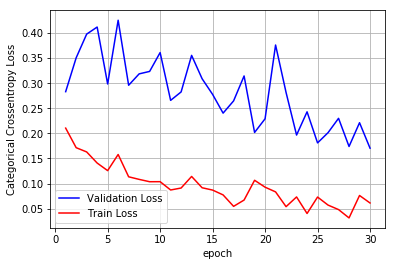

In [82]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,epochs+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [87]:
test_pred=model.predict(ntimages) 
pred=test_pred.argmax(axis=1)
print("Accuracy=",accuracy_score(tru,pred))

Accuracy= 0.9444444444444444


In [88]:
cm=confusion_matrix(tru, pred)

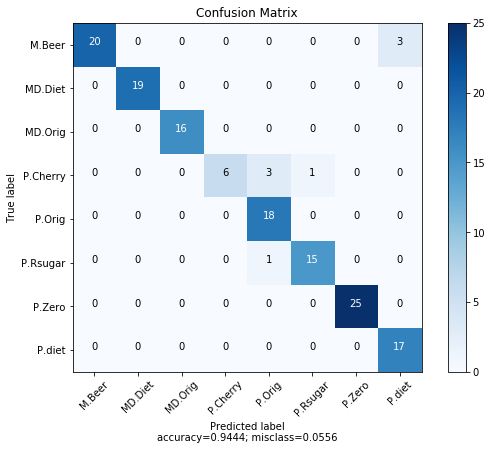

In [89]:
plot_confusion_matrix(cm           = cm, 
                      normalize    = False,
                      target_names = k,
                      title        = "Confusion Matrix")